___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

## Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the **arrest rate**. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops. Then, you'll calculate the **hourly arrest rate** by using the ``hour`` attribute of the ``index``. The hour ranges from ``0`` to ``23``, in which:

``0 = midnight``<br>
``12 = noon`` <br>
``23 = 11 PM``

> Before starting your work in this section **repeat the steps which you did in the first chapter for preparing the data.** Continue to this chapter based on where you were in the end of the first chapter.

In [14]:
import pandas as pd
import numpy as np

In [36]:
ri=pd.read_csv('Traffic_Police_Stops_1.csv')
ri.tail()

/Users/damlagurbaz/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,stop_datetime,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
48005,2006-08-08 22:45:00,RI-2006-35917,Zone K3,300,M,1973.0,33.0,B,Black,Equipment/Inspection Violation,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K3
48006,2006-08-08 22:45:00,RI-2006-35918,Zone K3,300,F,1971.0,35.0,B,Black,Speeding,...,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K3
48007,2006-08-08 22:53:00,RI-2006-35919,Zone X4,500,M,1952.0,54.0,W,White,Speeding,...,False,NaN,NaN,False,Citation,False,16-30 Min,True,False,Zone X4
48008,2006-08-08 23:00:00,RI-2006-35920,Zone K1,600,F,1982.0,24.0,W,White,Speeding,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
48009,2006-08-08 23:00:00,RI-2006-35921,Zone K3,300,M,1965.0,41.0,W,White,Speeding,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone K3


In [44]:
ri['stop_datetime']=pd.to_datetime(ri['stop_datetime'])

In [46]:
ri.set_index('stop_datetime',inplace=True)

In [47]:
ri.shape

(48010, 20)

In [48]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48010 entries, 2005-01-02 01:55:00 to 2006-08-08 23:00:00
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  48010 non-null  object 
 1   location_raw        48010 non-null  object 
 2   police_department   48010 non-null  object 
 3   driver_gender       48010 non-null  object 
 4   driver_age_raw      48010 non-null  float64
 5   driver_age          47778 non-null  float64
 6   driver_race_raw     48010 non-null  object 
 7   driver_race         48010 non-null  object 
 8   violation_raw       48010 non-null  object 
 9   violation           48010 non-null  object 
 10  search_conducted    48010 non-null  bool   
 11  search_type_raw     2012 non-null   object 
 12  search_type         2012 non-null   object 
 13  contraband_found    48010 non-null  bool   
 14  stop_outcome        48010 non-null  object 
 15  is_arrested       

**INSTRUCTIONS**

*   Take the mean of the ``is_arrested`` column to calculate the overall arrest rate.
*   Group by the ``hour`` attribute of the ``DataFrame`` index to calculate the hourly arrest rate.
*   Save the **hourly arrest rate** ``Series`` as a new object, ``hourly_arrest_rate``.

In [49]:
ri['is_arrested'].mean()

0.05182253697146428

In [50]:
ri.index

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-02 20:30:00',
               '2005-01-04 12:55:00', '2005-01-06 01:30:00',
               '2005-01-12 08:05:00', '2005-01-18 08:15:00',
               '2005-01-18 17:13:00', '2005-01-23 23:15:00',
               '2005-01-24 20:32:00', '2005-02-09 03:05:00',
               ...
               '2006-08-08 22:22:00', '2006-08-08 22:25:00',
               '2006-08-08 22:30:00', '2006-08-08 22:30:00',
               '2006-08-08 22:45:00', '2006-08-08 22:45:00',
               '2006-08-08 22:45:00', '2006-08-08 22:53:00',
               '2006-08-08 23:00:00', '2006-08-08 23:00:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=48010, freq=None)

In [51]:
hourly_arrest_rate=ri.groupby(ri.index.hour)['is_arrested'].mean()
hourly_arrest_rate

stop_datetime
0     0.091657
1     0.113384
2     0.113103
3     0.084877
4     0.065217
5     0.037975
6     0.020573
7     0.022004
8     0.023802
9     0.031267
10    0.033094
11    0.026150
12    0.046575
13    0.035284
14    0.034194
15    0.046850
16    0.044487
17    0.054431
18    0.049796
19    0.059952
20    0.060850
21    0.115991
22    0.073970
23    0.066730
Name: is_arrested, dtype: float64

***

## Plotting the hourly arrest rate

You'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

**INSTRUCTIONS**

*   Import ``matplotlib.pyplot`` using the alias ``plt``.
*   Create a **line plot** of ``hourly_arrest_rate`` using the ``.plot()`` method.
*   Label the ``x-axis`` as ``'Hour'``, label the ``y-axis`` as ``'Arrest Rate'``, and title the plot ``'Arrest Rate by Time of Day'``.
*   Display the plot using the ``.show()`` function.

In [52]:
import matplotlib.pyplot as plt

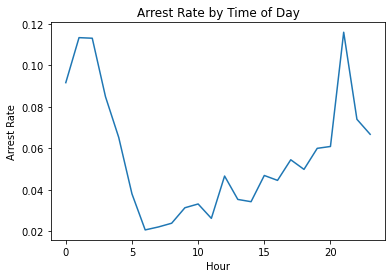

In [53]:
hourly_arrest_rate.plot.line()

plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

plt.show()

***

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. You'll assess whether these **drug-related stops** are becoming more common over time.

The Boolean column ``drugs_related_stop`` indicates whether drugs were found during a given stop. You'll calculate the **annual drug rate** by **resampling** this column, and then you'll use a line plot to visualize how the rate has changed over time.

**INSTRUCTIONS**

*   Calculate the **annual rate** of drug-related stops by **resampling** the ``drugs_related_stop`` column (on the ``'A'`` frequency) and taking the mean.
*   Save the annual drug rate ``Series`` as a new object, ``annual_drug_rate``.
*   Create a line plot of ``annual_drug_rate`` using the ``.plot()`` method.
*   Display the plot using the ``.show()`` function.

In [54]:
ri.sample()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2006-02-07 00:40:00,RI-2006-06577,Zone X3,200,M,1972.0,34.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone X3


In [55]:
ri['drugs_related_stop'].value_counts()

False    47685
True       325
Name: drugs_related_stop, dtype: int64

In [56]:
ri['drugs_related_stop'].resample('A').sum()

stop_datetime
2005-12-31    111
2006-12-31    214
Freq: A-DEC, Name: drugs_related_stop, dtype: int64

In [57]:
annual_drug_rate=ri['drugs_related_stop'].resample('A').mean()
annual_drug_rate

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006257
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

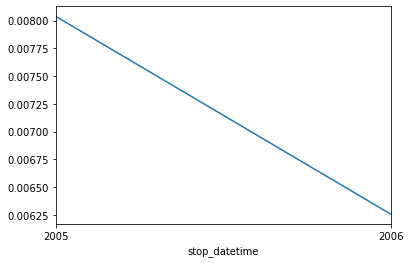

In [58]:
annual_drug_rate.plot()

plt.show()

***

## Comparing drug and search rates (to be deleted)

As you saw in the last exercise, the rate of **drug-related stops** increased significantly between ``2005`` and ``2015``. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

**INSTRUCTIONS**

*   Calculate the annual search rate by **resampling** the ``search_conducted`` column, and save the result as ``annual_search_rate``.
*   Concatenate ``annual_drug_rate`` and ``annual_search_rate`` along the ``columns axis``, and save the result as ``annual``.
*   Create subplots of the drug and search rates from the ``annual`` ``DataFrame``.
*   Display the subplots.

In [59]:
ri['search_conducted']

stop_datetime
2005-01-02 01:55:00    False
2005-01-02 20:30:00    False
2005-01-04 12:55:00    False
2005-01-06 01:30:00    False
2005-01-12 08:05:00    False
                       ...  
2006-08-08 22:45:00    False
2006-08-08 22:45:00    False
2006-08-08 22:53:00    False
2006-08-08 23:00:00    False
2006-08-08 23:00:00    False
Name: search_conducted, Length: 48010, dtype: bool

In [60]:
annual_search_rate=ri['search_conducted'].dropna().astype('int').resample('A').mean()
annual_search_rate

stop_datetime
2005-12-31    0.050692
2006-12-31    0.038361
Freq: A-DEC, Name: search_conducted, dtype: float64

In [61]:
annual=pd.concat([annual_drug_rate,annual_search_rate],axis='columns')
annual

,drugs_related_stop,search_conducted
stop_datetime,,
2005-12-31,0.008038,0.050692
2006-12-31,0.006257,0.038361


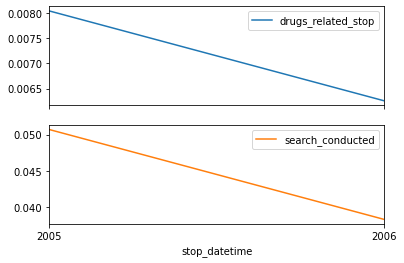

In [62]:
#1.method
annual.plot(subplots=True, kind='line');

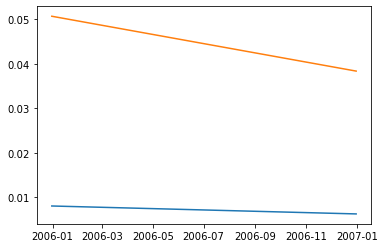

In [63]:
#2.method (matplotlib)

fig, ax=plt.subplots()
ax.plot(annual);

***

## Tallying violations by district

The state of **Rhode Island** is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the ``"K"`` zones, which you'll examine further in the next exercise.

**INSTRUCTIONS**

*   Create a ``frequency table`` from the ``district`` and ``violation`` columns using the ``pd.crosstab()`` function.
*   Save the ``frequency table`` as a new object, ``all_zones``.
*   Select rows ``'Zone K1'`` through ``'Zone K3'`` from ``all_zones`` using the ``.loc[]`` accessor.
*   Save the smaller table as a new object, ``k_zones``.

In [64]:
ri.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,Other,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [65]:
ri.district.unique()  #categorical tipde var.bu tipin olmasinin sebebi:
                        #buna has cesitli fonksiyonlar var bunlari kullababilmek icin bu tipe ceviririz

array(['Zone K1', 'Zone X4', 'Zone X1', 'Zone K3', 'Zone X3', 'Zone K2'],
      dtype=object)

In [66]:
ri.district.value_counts()

Zone K3    13554
Zone X4    10563
Zone K2     9707
Zone K1     6809
Zone X3     5460
Zone X1     1917
Name: district, dtype: int64

In [67]:
ri.violation.unique()

array(['Speeding', 'Equipment', 'Other', 'Moving violation',
       'Registration/plates'], dtype=object)

In [68]:
ri.violation.value_counts()

Speeding               36111
Moving violation        6522
Equipment               3022
Registration/plates     1463
Other                    892
Name: violation, dtype: int64

In [69]:
all_zones=pd.crosstab(ri['district'], columns=ri['violation'])#bir sutun ile bir sutun arasindaki iliski-frequency table- denildiginde pd.crosstab gelmeli
all_zones

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
district,,,,,
Zone K1,276,517,69,52,5895
Zone K2,422,1220,156,256,7653
Zone K3,1083,1181,247,435,10608
Zone X1,93,643,44,9,1128
Zone X3,342,741,127,102,4148
Zone X4,806,2220,249,609,6679


In [70]:
k_zones=all_zones.loc['Zone K1':'Zone K3']
k_zones

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
district,,,,,
Zone K1,276,517,69,52,5895
Zone K2,422,1220,156,256,7653
Zone K3,1083,1181,247,435,10608


***

## Plotting violations by district

Now that you've created a frequency table focused on the ``"K"`` zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a **bar plot**, which is an appropriate plot type since you're comparing categorical data. Then you'll create a **stacked bar plot** in order to get a slightly different look at the data. Which plot do you find to be more insightful?

**INSTRUCTIONS 1/2**

*   Create a bar plot of ``k_zones``.
*   Display the plot and examine it. What do you notice about each of the zones?

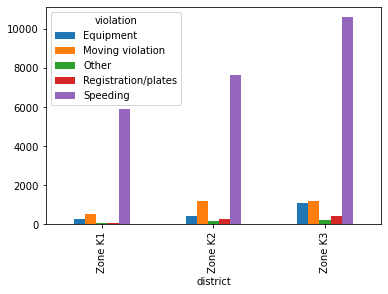

In [71]:
k_zones.plot(kind='bar');  #bar plot


tum ZoneK bolgelerinde speeding ihlali buyuk farklarla en cok karsilasilan ihlal turudur.

ZoneK1 diger iki bolgeye nazaran tum ihlal oranlari en az bolge diyebiliriz.

ZoneK2 ve ZoneK3 ihlaller acisindan oldukca benzerdir..



**INSTRUCTIONS 2/2**

*   Create a stacked bar plot of ``k_zones``.
*   Display the plot and examine it. Do you notice anything different about the data than you did previously?

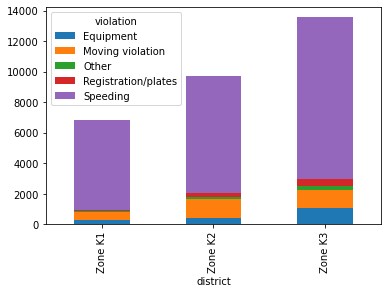

In [72]:
k_zones.plot(kind='bar',stacked=True);  #stacked bar plot(yigin)

***

## Converting stop durations to numbers

In the traffic stops dataset, the ``stop_duration`` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as ``strings``, such as ``'0-15 Min'``. How can you make this data easier to analyze?

In this exercise, you'll convert the **stop durations** to ``integers``. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

*   Convert ``'0-15 Min'`` to ``8``
*   Convert ``'16-30 Min'`` to ``23``
*   Convert ``'30+ Min'`` to ``45``

**INSTRUCTIONS**

*   Print the **unique values** in the ``stop_duration`` column. (This has been done for you.)
*   Create a ``dictionary`` called ``mapping`` that maps the ``stop_duration`` strings to the integers specified above.
*   Convert the ``stop_duration`` strings to integers using the ``mapping``, and store the results in a new column called ``stop_minutes``.
*   Print the unique values in the ``stop_minutes`` column, to verify that the durations were properly converted to integers.

In [73]:
ri.stop_duration.value_counts()

0-15 Min     40662
16-30 Min     5672
30+ Min       1676
Name: stop_duration, dtype: int64

In [74]:
mapping={'0-15 Min':8,
       '16-30 Min':23,
       '30+ Min':45}

In [75]:
ri['stop_minutes']=ri['stop_duration'].map(mapping)

In [76]:
ri['stop_minutes'].unique()

array([ 8, 23, 45])

***

In [ ]:
#farkli bir yaklasim--->. ri["stop_minutes"] = ri["stop_duration"].replace(mapping).astype("int")

## Plotting stop length

If you were stopped for a particular violation, how long might you expect to be detained?

In this exercise, you'll visualize the **average length** of time drivers are stopped for each **type** of **violation**. Rather than using the ``violation`` column in this exercise, you'll use ``violation_raw`` since it contains more detailed descriptions of the violations.

**INSTRUCTIONS**

*   For each value in the ``violation_raw`` column, calculate the **mean number** of ``stop_minutes`` that a driver is detained.
*   Save the resulting ``Series`` as a new object, ``stop_length``.
*   Sort ``stop_length`` by its values, and then visualize it using a **horizontal bar plot**.
*   Display the plot.

In [77]:
ri['violation_raw'].unique()

array(['Speeding', 'Equipment/Inspection Violation', 'Call for Service',
       'Other Traffic Violation', 'Registration Violation',
       'Violation of City/Town Ordinance',
       'Special Detail/Directed Patrol', 'APB',
       'Motorist Assist/Courtesy', 'Suspicious Person', 'Warrant'],
      dtype=object)

In [78]:
stop_length=ri.groupby('violation_raw')['stop_minutes'].mean()

In [79]:
stop_length

violation_raw
APB                                 28.078431
Call for Service                    27.637895
Equipment/Inspection Violation      13.668101
Motorist Assist/Courtesy            15.528409
Other Traffic Violation             14.207298
Registration Violation              17.304170
Special Detail/Directed Patrol      30.902778
Speeding                             9.707181
Suspicious Person                   21.821429
Violation of City/Town Ordinance    11.153846
Warrant                             29.666667
Name: stop_minutes, dtype: float64

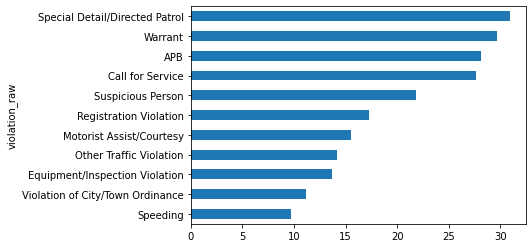

In [80]:
stop_length.sort_values().plot.barh();